In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.cluster import KMeans
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

#KMeans Clustering

##Dataset: College Student Data (https://www.kaggle.com/datasets/kuchhbhi/cpga-iq-placement)

In [165]:
#Import student clustering dataset
data = pd.read_csv('/content/student_clustering.csv')
print(data.head())
print(data.shape)

   cgpa   iq
0  5.13   88
1  5.90  113
2  8.36   93
3  8.27   97
4  5.45  110
(200, 2)


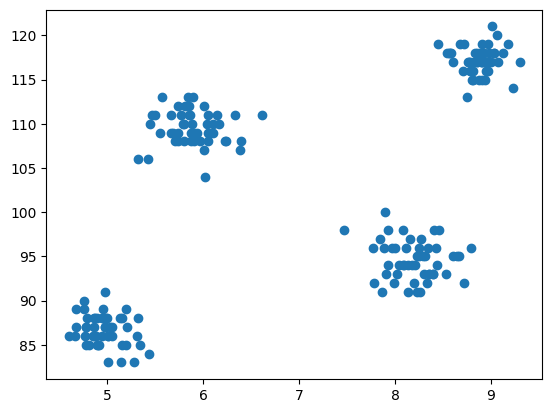

In [166]:
#Scatter plot of student clustering data
plt.scatter(data['cgpa'],data['iq'])
plt.show()

In [167]:
#Scale the student clustering data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.to_numpy())
scaled_data = pd.DataFrame(scaled_data, columns=['cgpa','iq'])

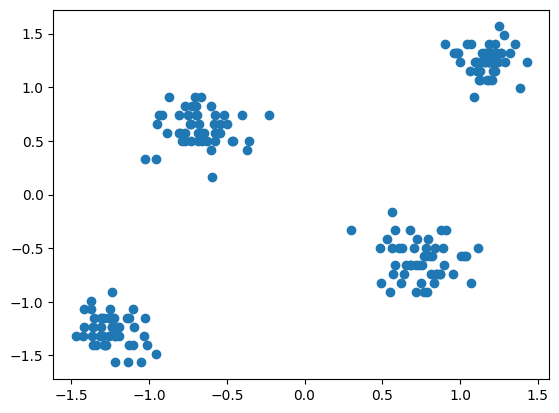

In [168]:
#Scatter plot of scaled student clustering data
plt.scatter(scaled_data['cgpa'],scaled_data['iq'])
plt.show()

##KMeans() from sklearn

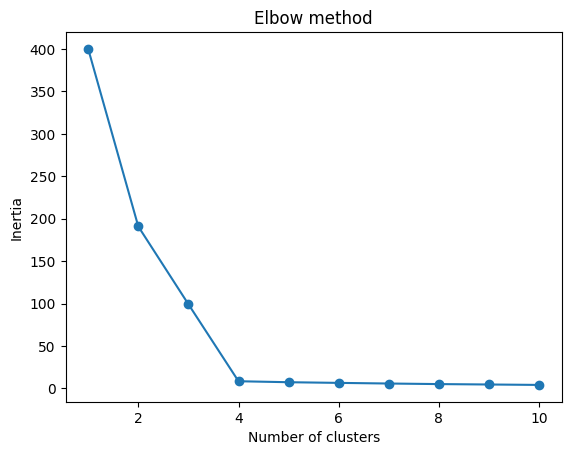

In [169]:
#Finding optimal number of clusters (k) using Elbow method
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42)
  kmeans.fit(scaled_data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

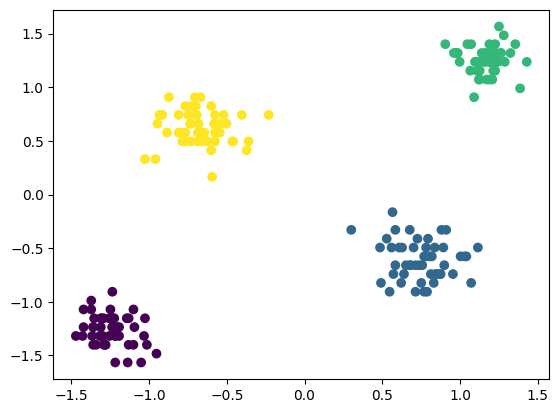

Inertia or within-cluster sum ofsquares: 8.477237626556295
Number of iterations: 4
Centroids:
 [[-1.24429338 -1.26080305]
 [ 0.75084754 -0.60958735]
 [ 1.16540625  1.25008684]
 [-0.6719604   0.62030356]]


In [170]:
#Using sklearn KMeans for k = 4
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 42)
kmeans.fit(scaled_data)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = kmeans.labels_)
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Centroids:\n", kmeans.cluster_centers_)

##K-Means Algorithm

In [171]:
#Initialize a set of k centers
def init_centroid(data, k):
  #Selecting a random point as the first centroid from the data
  centroids = []
  #Select k random points as centers
  for i in range(k):
    centroid = data[rand.randint(0,199)]
    centroids.append(centroid)
  return centroids

#Assignment Step: Assign each point to its nearest center
def assign_point_to_cluster(data, centroids):
  assignments = []
  for point in data:
    point_clust = []
    for centroid in centroids:
      dist_clust = np.sqrt(np.sum((np.array(point) - np.array(centroid))**2))
      point_clust.append(dist_clust)
    assignment = np.argmin(point_clust)
    assignments.append(assignment)
  return assignments

#Update Step: Recalculate means (centroids) for observations assigned to each cluster
def new_centroids(data, centroids, assignments, k):
  new_centroids = []
  for i in range(k):
    cluster_center = []
    for point in range(len(data)):
      if (assignments[point] == i):
        cluster_center.append(data[point])
    if len(cluster_center) == 0:
      mean_c =[0,0]
    else:
      mean_c = np.mean(cluster_center, axis=0)
    new_centroids.append(mean_c)
  return new_centroids

#Calculate within-cluster sum of squares
def wcss(data, assignments, centroids):
  error = []
  for i in range(len(data)):
    centroid = centroids[assignments[i]]
    #Compute the distance between a point and its closest center
    dist = np.sqrt(np.sum((data[i] - centroid)**2))
    error.append(dist**2)
  wcss = sum(error)
  return wcss

#kmeans_clustering
def kmeans_clustering(data, k, max_iter = 10, tol = pow(10,-3)):
  iter = -1
  wcss_lst = []
  assignments = []

  #Initial centers/centroids
  centroids = init_centroid(data, k)

  #While the k-means algorithm converges
  while (len(wcss_lst)<=1 or (iter < max_iter and np.absolute(wcss_lst[iter] - wcss_lst[iter-1])/wcss_lst[iter-1] >= tol)):
    iter = iter + 1
    #Assign points to the closest center
    assignments = assign_point_to_cluster(data, centroids)
    #Compute new centers/centroids
    centroids = new_centroids(data, centroids, assignments, k)
    #Compute WCSS/Inertia
    wcss_values = wcss(data, assignments, centroids)
    wcss_lst.append(wcss_values)
    inertia = wcss_lst[-1]

  return (centroids, assignments, iter, inertia)

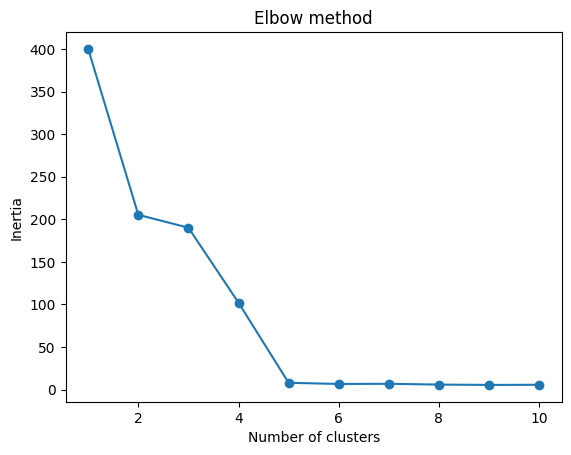

In [172]:
#Finding optimal number of clusters (k) using Elbow method
inertias = []
data = scaled_data.values.tolist()

for i in range(1,11):
  result = kmeans_clustering(data, k = i)
  inertias.append(result[3])

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

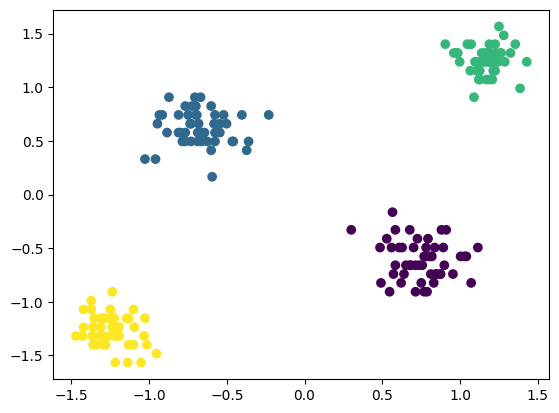

Inertia or within-cluster sum ofsquares: 8.477237626556299
Number of iterations: 3
Centroids:
 [array([ 0.75084754, -0.60958735]), array([-0.6719604 ,  0.62030356]), array([1.16540625, 1.25008684]), array([-1.24429338, -1.26080305])]


In [175]:
#KMeans for k = 4
result = kmeans_clustering(data, k = 4)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

##ε-Differentially Private K-Means

In [132]:
#Initialize a set of k centers
def init_centroid(data, k):
  #Selecting a random point as the first centroid from the data
  centroids = []
  #Select k random points as centers
  for i in range(k):
    centroid = data[rand.randint(0,199)]
    centroids.append(centroid)
  return centroids

#Assignment Step: Assign each point to its nearest center
def assign_point_to_cluster(data, centroids):
  assignments = []
  for point in data:
    point_clust = []
    for centroid in centroids:
      dist_clust = np.sqrt(np.sum((np.array(point) - np.array(centroid))**2))
      point_clust.append(dist_clust)
    assignment = np.argmin(point_clust)
    assignments.append(assignment)
  return assignments

#Update Step: Recalculate means (centroids) for observations assigned to each cluster
def new_centroids(data, centroids, assignments, k, max_iter, epsilon):
  new_centroids = []
  for i in range(k):
    cluster_points = []
    for point in range(len(data)):
      if (assignments[point] == i):
        cluster_points.append(data[point])
    #Noisily compute the size of each cluster
    size_noise = np.random.laplace(loc = 0, scale = ((2*max_iter)/epsilon))
    size = len(cluster_points) + size_noise
    #Compute noisy sums of points in each cluster
    x = [sub[0] for sub in cluster_points]
    y = [sub[1] for sub in cluster_points]
    if len(x) == 0:
      max_x = 0
      min_x = 0
    else:
      max_x = max(x)
      min_x = min(x)
    if len(y) == 0:
      max_y = 0
      min_y = 0
    else:
      max_y = max(y)
      min_y = min(y)
    domain_x = abs(max_x - min_x)
    domain_y = abs(max_y - min_y)
    sum_x_noise = np.random.laplace(loc = 0, scale = ((2*max_iter*domain_x)/epsilon))
    sum_y_noise = np.random.laplace(loc = 0, scale = ((2*max_iter*domain_y)/epsilon))
    sum_x = sum(x) + sum_x_noise
    sum_y = sum(y) + sum_y_noise
    x_c = sum_x/size
    y_c = sum_y/size
    new_centroids.append([x_c,y_c])
  return new_centroids

#Calculate within-cluster sum of squares
def wcss(data, assignments, centroids):
  error = []
  for i in range(len(data)):
    centroid = centroids[assignments[i]]
    #Compute the distance between a point and its closest center
    dist = np.sqrt(np.sum((np.array(data[i]) - np.array(centroid))**2))
    error.append(dist**2)
  wcss = sum(error)
  return wcss

#ε-Differentially Private KMeans_clustering
def dp_kmeans_clustering(data, k,  epsilon, max_iter = 10, tol = pow(10,-3)):
  iter = -1
  wcss_lst = []
  assignments = []

  #Initial centers/centroids
  centroids = init_centroid(data, k)

  #While the k-means algorithm converges
  while (iter < max_iter):
    iter = iter + 1
    #Assign points to the closest center
    assignments = assign_point_to_cluster(data, centroids)
    #Compute new centers/centroids
    centroids = new_centroids(data, centroids, assignments, k, max_iter, epsilon)
    #Compute WCSS/Inertia
    wcss_values = wcss(data, assignments, centroids)
    wcss_lst.append(wcss_values)
    inertia = wcss_lst[-1]

  return (centroids, assignments, iter, inertia)

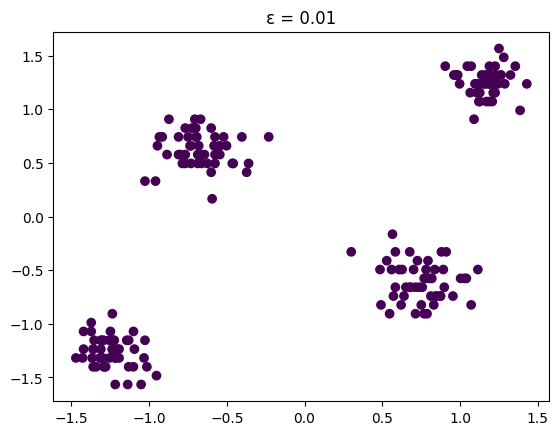

Inertia or within-cluster sum ofsquares: 6345.065413535866
Number of iterations: 10
Centroids:
 [[0.0, 0.0], [2.868143274187415, 4.636710172785531], [0.0, 0.0], [-0.0, -0.0]]


In [133]:
#ε-Differentially Private KMeans clustering for k = 4 and ε = 0.01
result = dp_kmeans_clustering(data, k = 4, epsilon = 0.01)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.title('ε = 0.01')
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

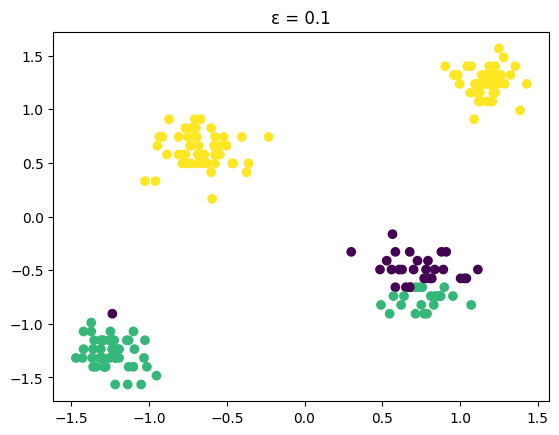

Inertia or within-cluster sum ofsquares: 80873.37374361423
Number of iterations: 10
Centroids:
 [[0.6919915340545056, 1.1764156005456592], [0.0, 0.0], [-34.24327340375698, -4.800157787442781], [1.8188359431192982, -1.031744351422992]]


In [134]:
#ε-Differentially Private KMeans clustering for k = 4 and ε = 0.1
result = dp_kmeans_clustering(data, k = 4, epsilon = 0.1)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.title('ε = 0.1')
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

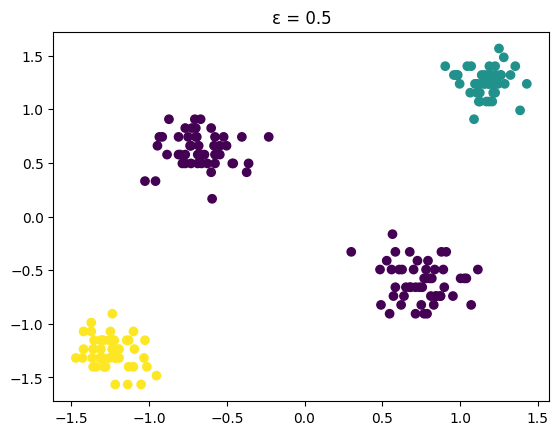

Inertia or within-cluster sum ofsquares: 450.7307446355621
Number of iterations: 10
Centroids:
 [[1.3664446602518003, 0.11675916740571718], [1.9406235762078818, 1.884278979108949], [-1.9544538226969805, -2.682910459206153], [-0.0, -0.0]]


In [135]:
#ε-Differentially Private KMeans clustering for k = 4 and ε = 0.5
result = dp_kmeans_clustering(data, k = 4, epsilon = 0.5)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.title('ε = 0.5')
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

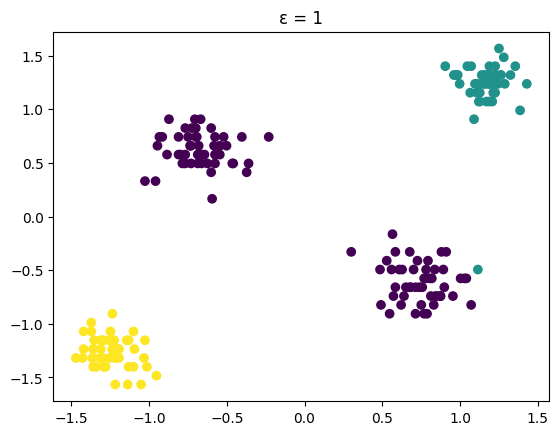

Inertia or within-cluster sum ofsquares: 202.61423201232532
Number of iterations: 10
Centroids:
 [[0.08288790407217143, -0.019416093749500644], [1.4253782965988337, -0.13288717741324702], [-1.0805120954550382, -0.9093944811344143], [-0.0, -0.0]]


In [136]:
#ε-Differentially Private KMeans clustering for k = 4 and ε = 1
result = dp_kmeans_clustering(data, k = 4, epsilon = 1)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.title('ε = 1')
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

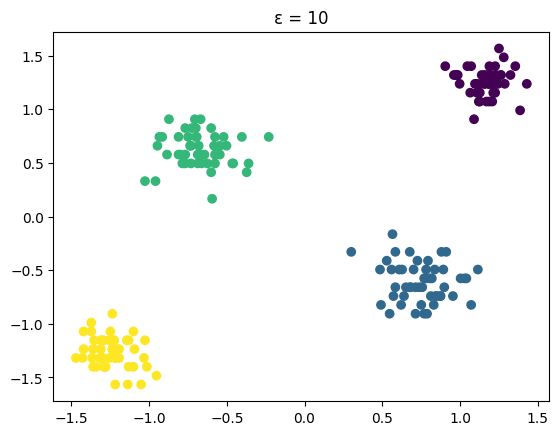

Inertia or within-cluster sum ofsquares: 9.034051157330145
Number of iterations: 10
Centroids:
 [[1.1500462744250572, 1.2378065047011884], [0.7761036471285595, -0.6233618298360162], [-0.6713405775161183, 0.7083252434990456], [-1.247375399918525, -1.3073243178142286]]


In [137]:
#ε-Differentially Private KMeans clustering for k = 4 and ε = 10
result = dp_kmeans_clustering(data, k = 4, epsilon = 10)

#Scatter plot for k = 4 clusters
plt.scatter(scaled_data['cgpa'], scaled_data['iq'], c = result[1])
plt.title('ε = 10')
plt.show()

#Information about the clusters
print("Inertia or within-cluster sum ofsquares:", result[3])
print("Number of iterations:", result[2])
print("Centroids:\n", result[0])

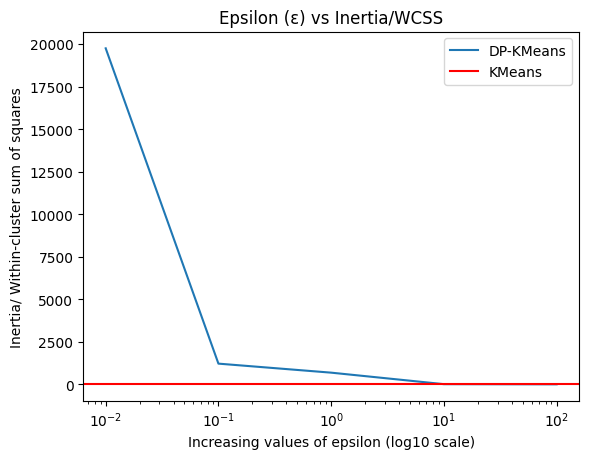

In [66]:
#ε-Differentially Private KMeans clustering for k = 4
epsilon = [10**i for i in range(-2,3)]
inertia = []
for eps in epsilon:
  result = dp_kmeans_clustering(data, k = 4, epsilon = eps)
  inertia.append(result[3])

#Inertia vs epsilon plot
plt.xscale("log")
plt.plot(epsilon,inertia, label = "DP-KMeans")
plt.axhline(y = kmeans.inertia_, color = 'r', linestyle = '-', label = "KMeans")
plt.legend()
plt.title('Epsilon (ε) vs Inertia/WCSS')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Inertia/ Within-cluster sum of squares')
plt.show()

#Naive Bayes Classifier (Categorical Attributes) 

J. Vaidya, B. Shafiq, A. Basu and Y. Hong, "Differentially Private Naive Bayes Classification," 2013 IEEE/WIC/ACM International Joint Conferences on Web Intelligence (WI) and Intelligent Agent Technologies (IAT), Atlanta, GA, USA, 2013, pp. 571-576, doi: 10.1109/WI-IAT.2013.80.

##Dataset: Mushroom. (1987). UCI ML Repository. https://doi.org/10.24432/C5959T.

In [110]:
#Load the Mushroom dataset with categorical attributes
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header = None, delimiter = ',', na_values = '?')
data.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

#Drop 'stalk-root' feature with null '?' values
data.drop(['stalk-root'], axis = 1, inplace = True)

#Convert categorical variables using label encoding
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = leX = data.drop('class', axis = 1)

#Split the dataset into train set (70%) and test set (30%)
X = data.drop("class",axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##CategoricalNB() from sklearn

In [112]:
#Use CategoricalNB() from sklearn
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Evaluate the performance of model
print("Performance evaluation of CategoricalNB:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average = 'weighted')
recall_nb = recall_score(y_test, y_pred, average = 'weighted')
f1_nb = f1_score(y_test, y_pred, average = 'weighted')
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of CategoricalNB:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1257
           1       1.00      0.91      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438

[[1252    5]
 [ 111 1070]]

Accuracy Score:  0.9524200164068909
Precision Score:  0.9557585747378193
Recall Score:  0.9524200164068909
F1 Score:  0.9522647200904559


##Naive Bayes Classifier (Categorical Attributes)

In [113]:
#Calculate prior_probabilities for each class in dataset
def prior_probabilities(y_train, class_label):
  n = y_train.shape[0]
  class_n = y_train.value_counts()[class_label]
  prior_prob = class_n/n
  return prior_prob

#Calculate conditional_probabilities for each feature value in a feature for a class in dataset
def conditional_probabilities(X_train, y_train,  class_label, feature, feature_value):
  X_class = X_train[y_train == class_label]
  cnt = np.sum(X_class[feature] == feature_value)
  class_n = y_train.value_counts()[class_label]
  cond_prob = cnt/class_n
  return cond_prob

#Calculate likelihood and predict the label based on Bayes Theorem
def predict(X_train, y_train, X_test):
  #Number of target classes
  classes = np.unique(y_train)
  #Features in the dataset
  features = [x for x in X_train.columns]
  #Compute posterior probabilites for each class
  posterior_prob = []
  for class_label in classes:
    likelihood = 1.0
    for feat in features:
      cond_prob = conditional_probabilities(X_train, y_train, class_label, feat, X_test[feat])
      likelihood *= cond_prob
    prior_prob = prior_probabilities(y_train, class_label)
    post_prob = prior_prob * likelihood
    posterior_prob.append(post_prob)
  #Predict label with maximum posterior probability
  pred = np.argmax(posterior_prob)
  return pred

#Categorical Naive Bayes
def cat_naivebayes(X_train, y_train, X_test):
  preds = []
  for i in range(X_test.shape[0]):
    pred_label = predict(X_train, y_train, X_test.iloc[i])
    preds.append(pred_label)
  return preds

In [115]:
#Build and evaluate Categorical Naive Bayes model on mushroom dataset
y_pred = cat_naivebayes(X_train, y_train, X_test)
print("Performance evaluation of cat_naivebayes:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of cat_naivebayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[[1252    5]
 [   1 1180]]

Accuracy Score:  0.9975389663658737
Precision Score:  0.9975445796959569
Recall Score:  0.9975389663658737
F1 Score:  0.9975390857156406


##ε-Differentially Private Naive Bayes Classifier (Categorical Attributes)

In [116]:
#Calculate prior_probabilities for each class in dataset
def prior_probabilities(y_train, class_label):
  n = y_train.shape[0]
  class_n = y_train.value_counts()[class_label]
  prior_prob = class_n/n
  return prior_prob

#Calculate conditional_probabilities for each feature value in a feature for a class in dataset
def conditional_probabilities(X_train, y_train,  class_label, feature, feature_value, epsilon):
  X_class = X_train[y_train == class_label]
  cnt = np.sum(X_class[feature] == feature_value)
  #Adding Laplace noise to count to ensure ε-Differential Privacy
  count_sensitivity = 1
  count_epsilon = epsilon
  count_noise = np.random.laplace(loc = 0, scale = count_sensitivity/count_epsilon)
  count = cnt + count_noise
  class_n = y_train.value_counts()[class_label]
  cond_prob = count/class_n
  return cond_prob

#Calculate likelihood and predict the label based on Bayes Theorem
def predict(X_train, y_train, X_test, epsilon):
  #Number of target classes
  classes = np.unique(y_train)
  #Features in the dataset
  features = [x for x in X_train.columns]
  #Compute posterior probabilites for each class
  posterior_prob = []
  for class_label in classes:
    likelihood = 1.0
    for feat in features:
      cond_prob = conditional_probabilities(X_train, y_train, class_label, feat, X_test[feat], epsilon)
      likelihood *= cond_prob
    prior_prob = prior_probabilities(y_train, class_label)
    post_prob = prior_prob * likelihood
    posterior_prob.append(post_prob)
  #Predict label with maximum posterior probability
  pred = np.argmax(posterior_prob)
  return pred

#ε-Differentially Private Categorical Naive Bayes
def dp_cat_naivebayes(X_train, y_train, X_test, epsilon):
  preds = []
  for i in range(X_test.shape[0]):
    pred_label = predict(X_train, y_train, X_test.iloc[i], epsilon)
    preds.append(pred_label)
  return preds

In [117]:
#Build and evaluate 0.1-Differentially Private Categorical Naive Bayes model on mushroom dataset
y_pred = dp_cat_naivebayes(X_train, y_train, X_test, epsilon=0.1)
print("Performance evaluation of 0.1-Differentially Private dp_cat_naivebayes:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 0.1-Differentially Private dp_cat_naivebayes:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1257
           1       0.99      0.94      0.96      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.96      0.97      2438
weighted avg       0.97      0.97      0.97      2438

[[1243   14]
 [  70 1111]]

Accuracy Score:  0.9655455291222313
Precision Score:  0.9664842659693494
Recall Score:  0.9655455291222313
F1 Score:  0.9655025541982926


In [118]:
#Build and evaluate 0.5-Differentially Private Categorical Naive Bayes model on mushroom dataset
y_pred = dp_cat_naivebayes(X_train, y_train, X_test, epsilon=0.5)
print("Performance evaluation of 0.5-Differentially Private dp_cat_naivebayes:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 0.5-Differentially Private dp_cat_naivebayes:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1257
           1       0.99      0.95      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438

[[1250    7]
 [  58 1123]]

Accuracy Score:  0.9733388022969647
Precision Score:  0.9741368083209058
Recall Score:  0.9733388022969647
F1 Score:  0.9733096705695583


In [119]:
#Build and evaluate 1-Differentially Private Categorical Naive Bayes model on mushroom dataset
y_pred = dp_cat_naivebayes(X_train, y_train, X_test, epsilon=1)
print("Performance evaluation of 1-Differentially Private dp_cat_naivebayes:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 1-Differentially Private dp_cat_naivebayes:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1257
           1       0.99      0.96      0.97      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

[[1249    8]
 [  51 1130]]

Accuracy Score:  0.9757998359310911
Precision Score:  0.9763677761964338
Recall Score:  0.9757998359310911
F1 Score:  0.9757789524809065


In [120]:
#Build and evaluate 10-Differentially Private Categorical Naive Bayes model on mushroom dataset
y_pred = dp_cat_naivebayes(X_train, y_train, X_test, epsilon=10)
print("Performance evaluation of 10-Differentially Private dp_cat_naivebayes:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 10-Differentially Private dp_cat_naivebayes:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

[[1252    5]
 [  12 1169]]

Accuracy Score:  0.9930270713699754
Precision Score:  0.9930421013493556
Recall Score:  0.9930270713699754
F1 Score:  0.9930263889879237


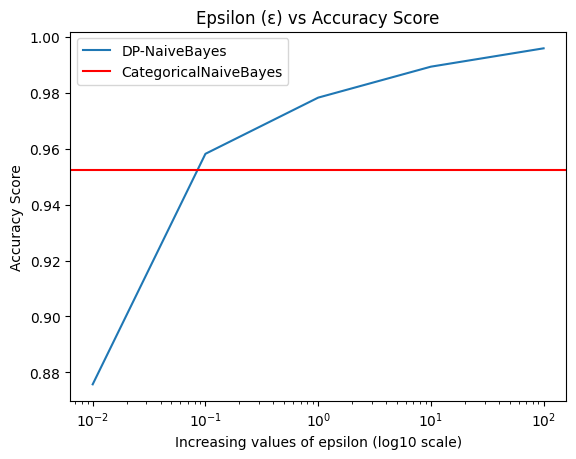

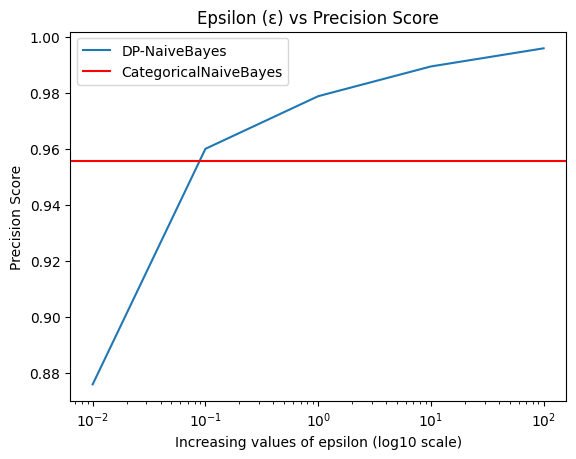

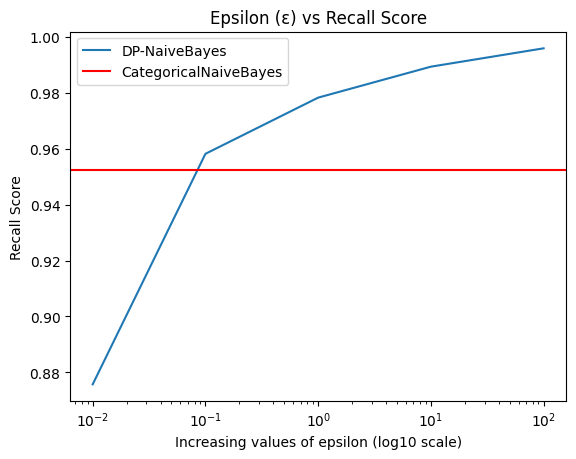

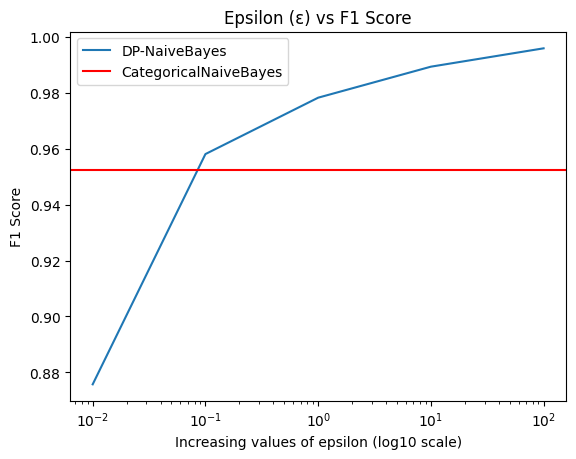

In [138]:
#ε-Differentially Private Categorical Naive Bayes
epsilon = [10**i for i in range(-2,3)]
accuracy = []
precision = []
recall = []
f1 = []
for eps in epsilon:
  y_pred = dp_cat_naivebayes(X_train, y_train, X_test, epsilon = eps)
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'weighted'))
  recall.append(recall_score(y_test, y_pred, average = 'weighted'))
  f1.append(f1_score(y_test, y_pred, average = 'weighted'))

#Accuracy vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, accuracy, label = 'DP-NaiveBayes')
plt.axhline(y = accuracy_nb, color = 'r', linestyle = '-', label = "CategoricalNaiveBayes")
plt.title('Epsilon (ε) vs Accuracy Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

#Precision vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, precision, label = 'DP-NaiveBayes')
plt.axhline(y = precision_nb, color = 'r', linestyle = '-', label = "CategoricalNaiveBayes")
plt.title('Epsilon (ε) vs Precision Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Precision Score')
plt.legend()
plt.show()

#Recall vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, recall, label = 'DP-NaiveBayes')
plt.axhline(y = recall_nb, color = 'r', linestyle = '-', label = "CategoricalNaiveBayes")
plt.title('Epsilon (ε) vs Recall Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

#F1 vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, f1, label = 'DP-NaiveBayes')
plt.axhline(y = f1_nb, color = 'r', linestyle = '-', label = "CategoricalNaiveBayes")
plt.title('Epsilon (ε) vs F1 Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

#Naive Bayes Classifier (Numeric Attributes)

J. Vaidya, B. Shafiq, A. Basu and Y. Hong, "Differentially Private Naive Bayes Classification," 2013 IEEE/WIC/ACM International Joint Conferences on Web Intelligence (WI) and Intelligent Agent Technologies (IAT), Atlanta, GA, USA, 2013, pp. 571-576, doi: 10.1109/WI-IAT.2013.80.

##Dataset: Iris dataset Fisher,R. (1988). Iris. UCI ML Repository. https://doi.org/10.24432/C56C76.

In [24]:
#Import iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
data['target'] = iris['target']

#Split the dataset into train set (70%) and test set (30%)
X = data.drop("target",axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##GaussianNB() from sklearn

In [67]:
#Use GaussianNB() from sklearn
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

#Evaluate the performance of model
print("Performance evaluation of GaussianNB:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average = 'weighted')
recall_nb = recall_score(y_test, y_pred, average = 'weighted')
f1_nb = f1_score(y_test, y_pred, average = 'weighted')
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of GaussianNB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Accuracy Score:  0.9777777777777777
Precision Score:  0.9793650793650793
Recall Score:  0.9777777777777777
F1 Score:  0.9777448559670783


##Naive Bayes Classifier (Numerical Attributes)

In [28]:
#Separate data by class labels
def separate_by_class(data):
  separated_data = dict()
  for i in range(len(data)):
    row = data[i]
    class_label = row[-1]
    if (class_label not in separated_data):
      separated_data[class_label] = list()
    separated_data[class_label].append(row)
  return separated_data

#Calculate mean of given column
def mean(class_column):
  avg = sum(class_column)/len(class_column)
  return avg

#Calculate standard deviation of given column
def std_dev(class_column):
  avg = mean(class_column)
  variance = sum([(x-avg)**2 for x in class_column])/(len(class_column)-1)
  std_dev = np.sqrt(variance)
  return std_dev

#Calculate mean, standard deviation and count for each column in dataset
def summarize_dataset(data):
	summaries = [(mean(column), std_dev(column), len(column)) for column in zip(*data)]
	del(summaries[-1])
	return summaries

#Split dataset by class and calculate statistics for each row
def summarize_by_class(data):
  separated_data = separate_by_class(data)
  summaries = dict()
  for class_label, rows in separated_data.items():
    summaries[class_label] = summarize_dataset(rows)
  return summaries

#Calculate Gaussian probability distribution function for x
def gaussian_pdf(x, mean, std_dev):
  exponent = np.exp(-((x-mean)**2/(2*std_dev**2)))
  prob = (1/(np.sqrt(2*np.pi)*std_dev))*exponent
  return prob

#Calculate probabilities and predict the class for given data
def predict(summaries, row):
  n = sum([summaries[label][0][2] for label in summaries])
  probs = dict()
  for class_label, class_summaries in summaries.items():
    probs[class_label] = summaries[class_label][0][2]/(n)
    for i in range(len(class_summaries)):
      mean, std_dev, _ = class_summaries[i]
      probs[class_label] *= gaussian_pdf(row[i], mean, std_dev)
  label = None
  max_prob = -1
  for class_label, prob in probs.items():
    if label == None or prob > max_prob:
      max_prob = prob
      label = class_label
  return label

In [29]:
#Build and evaluate Gaussian Naive Bayes model on iris dataset
train_df = pd.concat([X_train, y_train], axis=1)
train = train_df.values.tolist()
test = X_test.values.tolist()
model = summarize_by_class(train)
y_pred = []
for row in test:
  l = predict(model, row)
  y_pred.append(l)

print("Performance evaluation of Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of Gaussian Naive Bayes model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Accuracy Score:  0.9777777777777777
Precision Score:  0.9793650793650793
Recall Score:  0.9777777777777777
F1 Score:  0.9777448559670783


##ε-Differentially Private Naive Bayes Classifier (Numerical Attributes)

In [30]:
#Separate data by class labels
def separate_by_class(data):
  separated_data = dict()
  for i in range(len(data)):
    row = data[i]
    class_label = row[-1]
    if (class_label not in separated_data):
      separated_data[class_label] = list()
    separated_data[class_label].append(row)
  return separated_data

#Calculate noisy mean of given column
def mean(class_column, epsilon):
  avg = sum(class_column)/len(class_column)
  uj = max(class_column)
  lj = min(class_column)
  n = len(class_column)
  mean_sensitivity = (uj-lj)/(n+1)
  mean_epsilon = epsilon/(3*4)
  mean_noise = np.random.laplace(loc = 0, scale = (mean_sensitivity/mean_epsilon))
  mean = avg + mean_noise
  return mean

#Calculate noisy standard deviation of given column
def std_dev(class_column, epsilon):
  uj = max(class_column)
  lj = min(class_column)
  n = len(class_column)
  avg = np.mean(class_column)
  sd = np.sqrt(sum([(x-avg)**2 for x in class_column]) / float(len(class_column)-1))
  sd_sensitivity = (np.sqrt(n))*((uj-lj)/(n+1))
  sd_epsilon = epsilon/(3*4)
  sd_noise = np.random.laplace(loc = 0, scale = (sd_sensitivity/sd_epsilon))
  std_dev = sd + sd_noise
  return std_dev

#Calculate mean, standard deviation and count for each column in dataset
def summarize_dataset(data, epsilon):
	summaries = [(mean(column, epsilon), std_dev(column, epsilon), len(column)) for column in zip(*data)]
	del(summaries[-1])
	return summaries

#Split dataset by class and calculate statistics for each row
def summarize_by_class(data, epsilon):
  separated_data = separate_by_class(data)
  summaries = dict()
  for class_label, rows in separated_data.items():
    summaries[class_label] = summarize_dataset(rows, epsilon)
  return summaries

#Calculate Gaussian probability distribution function for x
def gaussian_pdf(x, mean, std_dev):
  exponent = np.exp(-((x-mean)**2/(2*std_dev**2)))
  prob = (1/(np.sqrt(2*np.pi)*std_dev))*exponent
  return prob

#Predict the class for given data
def predict(summaries, row, epsilon):
  n = sum([summaries[label][0][2] for label in summaries])
  probs = dict()
  for class_label, class_summaries in summaries.items():
    #Calculate noisy prior count
    prior_count_sensitivity = 1
    prior_count_epsilon = epsilon/3
    prior_count_noise = np.random.laplace(loc = 0, scale = (prior_count_sensitivity/prior_count_epsilon))
    probs[class_label] = ((summaries[class_label][0][2]) + prior_count_noise)/(n)
    for i in range(len(class_summaries)):
      mean, std_dev, _ = class_summaries[i]
      probs[class_label] *= gaussian_pdf(row[i], mean, std_dev)
  label = None
  max_prob = -1
  for class_label, prob in probs.items():
    if label == None or prob > max_prob:
      max_prob = prob
      label = class_label
  return label

In [31]:
#Build and evaluate 0.1-Differentially Private Gaussian Naive Bayes model on iris dataset
train_df = pd.concat([X_train, y_train], axis=1)
train = train_df.values.tolist()
test = X_test.values.tolist()
model = summarize_by_class(train, epsilon = 0.1)
y_pred = []
for row in test:
  l = predict(model, row, epsilon = 0.1)
  y_pred.append(l)

print("Performance evaluation of 0.1-Differentially Private Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 0.1-Differentially Private Gaussian Naive Bayes model:
              precision    recall  f1-score   support

           0       0.25      0.11      0.15        19
           1       0.24      0.31      0.27        13
           2       0.10      0.15      0.12        13

    accuracy                           0.18        45
   macro avg       0.20      0.19      0.18        45
weighted avg       0.20      0.18      0.17        45

[[ 2  6 11]
 [ 2  4  7]
 [ 4  7  2]]

Accuracy Score:  0.17777777777777778
Precision Score:  0.20241830065359478
Recall Score:  0.17777777777777778
F1 Score:  0.17460531238309018


In [32]:
#Build and evaluate 0.5-Differentially Private Gaussian Naive Bayes model on iris dataset
model = summarize_by_class(train, epsilon = 0.5)
y_pred = []
for row in test:
  l = predict(model, row, epsilon = 0.5)
  y_pred.append(l)

print("Performance evaluation of 0.5-Differentially Private Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 0.5-Differentially Private Gaussian Naive Bayes model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

[[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]

Accuracy Score:  0.28888888888888886
Precision Score:  0.08345679012345678
Recall Score:  0.28888888888888886
F1 Score:  0.12950191570881225


In [33]:
#Build and evaluate 1-Differentially Private Gaussian Naive Bayes model on iris dataset
model = summarize_by_class(train, epsilon = 1)
y_pred = []
for row in test:
  l = predict(model, row, epsilon = 1)
  y_pred.append(l)

print("Performance evaluation of 1-Differentially Private Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 1-Differentially Private Gaussian Naive Bayes model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        13
           2       0.29      1.00      0.45        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

[[ 0  0 19]
 [ 0  0 13]
 [ 0  0 13]]

Accuracy Score:  0.28888888888888886
Precision Score:  0.08345679012345678
Recall Score:  0.28888888888888886
F1 Score:  0.12950191570881225


In [34]:
#Build and evaluate 10-Differentially Private Gaussian Naive Bayes model on iris dataset
model = summarize_by_class(train, epsilon = 10)
y_pred = []
for row in test:
  l = predict(model, row, epsilon = 10)
  y_pred.append(l)

print("Performance evaluation of 10-Differentially Private Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))

Performance evaluation of 10-Differentially Private Gaussian Naive Bayes model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]

Accuracy Score:  0.7111111111111111
Precision Score:  0.5666666666666667
Recall Score:  0.7111111111111111
F1 Score:  0.6148148148148148


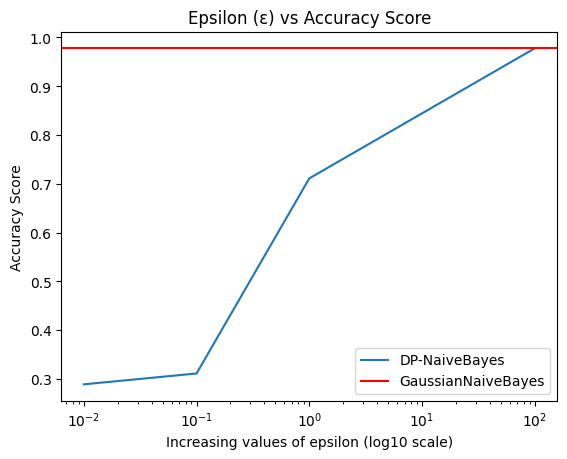

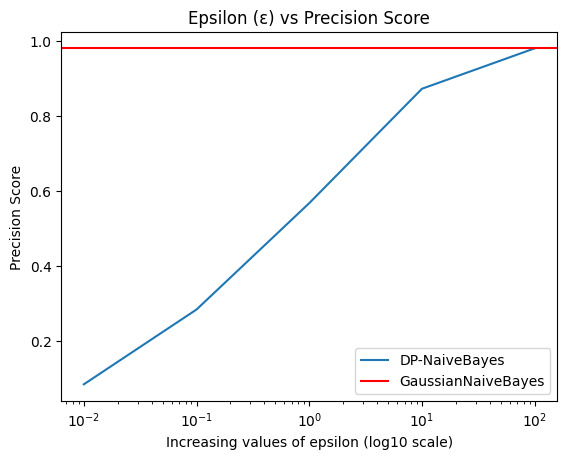

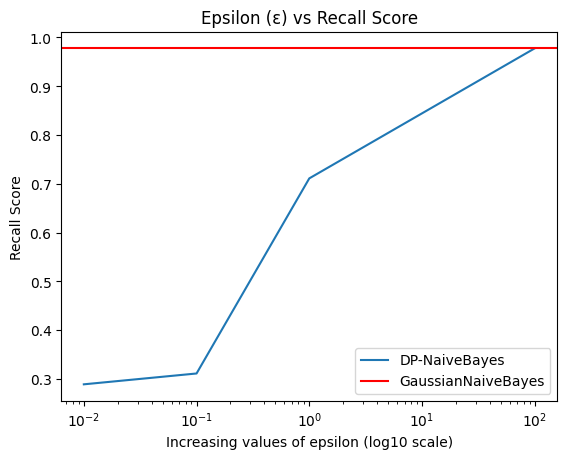

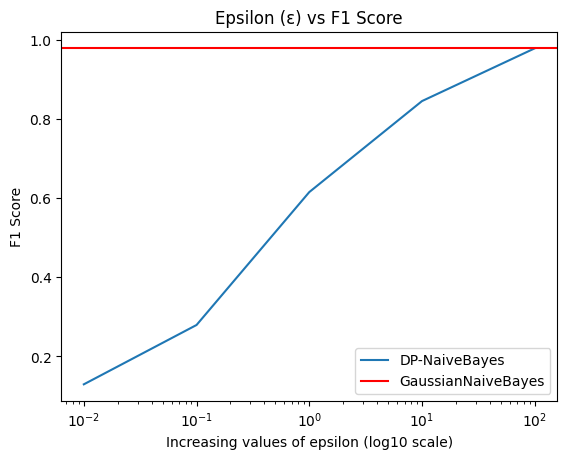

In [75]:
#ε-Differentially Private Gaussian Naive Bayes (Numerical Attributes)
epsilon = [10**i for i in range(-2,3)]
accuracy = []
precision = []
recall = []
f1 = []

for eps in epsilon:
  model = summarize_by_class(train, epsilon = eps)
  y_pred = []
  for row in test:
    l = predict(model, row, epsilon = 10)
    y_pred.append(l)
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'weighted'))
  recall.append(recall_score(y_test, y_pred, average = 'weighted'))
  f1.append(f1_score(y_test, y_pred, average = 'weighted'))

#Accuracy vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, accuracy, label = 'DP-NaiveBayes')
plt.axhline(y = accuracy_nb, color = 'r', linestyle = '-', label = "GaussianNaiveBayes")
plt.title('Epsilon (ε) vs Accuracy Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

#Precision vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, precision, label = 'DP-NaiveBayes')
plt.axhline(y = precision_nb, color = 'r', linestyle = '-', label = "GaussianNaiveBayes")
plt.title('Epsilon (ε) vs Precision Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Precision Score')
plt.legend()
plt.show()

#Recall vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, recall, label = 'DP-NaiveBayes')
plt.axhline(y = recall_nb, color = 'r', linestyle = '-', label = "GaussianNaiveBayes")
plt.title('Epsilon (ε) vs Recall Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

#F1 vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, f1, label = 'DP-NaiveBayes')
plt.axhline(y = f1_nb, color = 'r', linestyle = '-', label = "GaussianNaiveBayes")
plt.title('Epsilon (ε) vs F1 Score')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

#Simple Linear Regression (SLR)

Alabi Daniel, Audra McMillan, Jayshree Sarathy, Adam Smith, and Salil Vadhan. “Differentially private simple linear regression.” Proceedings on 23rd Privacy Enhancing Technologies Symposium (PoPETS ‘22), 2022, 2022 (2), 184–204.

##Dataset: Salary dataset salary_data of Employees with years of Experience (https://www.kaggle.com/datasets/harsh45/random-salary-data-of-employes-age-wise)

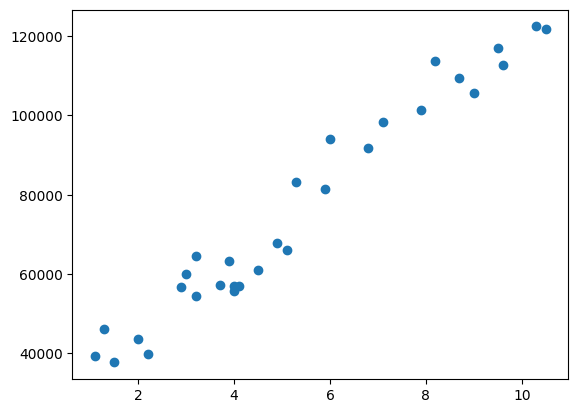

In [144]:
#Import salary dataset
data = pd.read_csv("/content/Salary_Dataset.csv")

#Scatter plot of salary
plt.scatter(data['YearsExperience'],data['Salary'])
plt.show()

#Splitting data into X and y
X = data.iloc[:, :1]
y = data.iloc[:, 1:]

##LinearRegression() from sklearn

In [145]:
slr = LinearRegression().fit(X,y)
print("Using LinearRegression() from sklearn:")
print("The regression line is y = {} + {} * X".format(float(slr.intercept_),float(slr.coef_)))
print("Rsquare = ",slr.score(X,y))

Using LinearRegression() from sklearn:
The regression line is y = 25792.200198668696 + 9449.962321455076 * X
Rsquare =  0.9569566641435086


##ε-Differentially Private Simple Linear Regression (SLR)

In [146]:
#ε-Differentially Private Simple Linear Regression (SLR)
def dp_slr(X, y, epsilon):
  ncov_xy = np.sum((X - np.mean(X))*(y - np.mean(y)))
  nvar_x = np.sum((X - np.mean(X))**2)

  #Compute noisy covariance and variance for alpha
  alpha_sensitivity = 1-(1/len(X))
  alpha_epsilon = epsilon/3
  alpha_noise = np.random.laplace(loc = 0, scale = alpha_sensitivity/alpha_epsilon)

  if (nvar_x + alpha_noise) <= 0: return None
  #Compute alpha (Slope of regression line)
  alpha = (ncov_xy + alpha_noise)/(nvar_x + alpha_noise)

  #Compute beta (Intercept of regression line)
  beta_sensitivity = (1/len(X))*(1 + abs(alpha))
  beta_epsilon = epsilon/3
  beta_noise = np.random.laplace(loc = 0, scale = beta_sensitivity/beta_epsilon)
  beta = (np.mean(y) - (alpha*np.mean(X))) + beta_noise
  return alpha, beta

In [147]:
#Fit and evaluate 0.1-Differentially Private Simple Linear Regression (SLR)
slope, intercept = dp_slr(data['YearsExperience'], data['Salary'], 0.1)
print("Using 0.1-Differentially Private Simple Linear Regression (SLR):")
print("The regression line is y = {} + {} * X".format(float(intercept),float(slope)))
y_pred = intercept + (slope*X)
r2 = r2_score(y, y_pred)
print("Rsquare = ",r2)

Using 0.1-Differentially Private Simple Linear Regression (SLR):
The regression line is y = 696.706869658612 + 11294.183381816783 * X
Rsquare =  0.5984395947652097


In [160]:
#Fit and evaluate 0.5-Differentially Private Simple Linear Regression (SLR)
slope, intercept = dp_slr(data['YearsExperience'], data['Salary'], 0.5)
print("Using 0.5-Differentially Private Simple Linear Regression (SLR):")
print("The regression line is y = {} + {} * X".format(float(intercept),float(slope)))
y_pred = intercept + (slope*X)
r2 = r2_score(y, y_pred)
print("Rsquare = ",r2)

Using 0.5-Differentially Private Simple Linear Regression (SLR):
The regression line is y = 24556.559969250324 + 9395.723581911629 * X
Rsquare =  0.9537289159304791


In [161]:
#Fit and evaluate 1-Differentially Private Simple Linear Regression (SLR)
slope, intercept = dp_slr(data['YearsExperience'], data['Salary'], 1)
print("Using 1-Differentially Private Simple Linear Regression (SLR):")
print("The regression line is y = {} + {} * X".format(float(intercept),float(slope)))
y_pred = intercept + (slope*X)
r2 = r2_score(y, y_pred)
print("Rsquare = ",r2)

Using 1-Differentially Private Simple Linear Regression (SLR):
The regression line is y = 25186.75254657516 + 9515.602080538021 * X
Rsquare =  0.9568198044567836


In [162]:
#Fit and evaluate 10-Differentially Private Simple Linear Regression (SLR)
slope, intercept = dp_slr(data['YearsExperience'], data['Salary'], 10)
print("Using 10-Differentially Private Simple Linear Regression (SLR):")
print("The regression line is y = {} + {} * X".format(float(intercept),float(slope)))
y_pred = intercept + (slope*X)
r2 = r2_score(y, y_pred)
print("Rsquare = ",r2)

Using 10-Differentially Private Simple Linear Regression (SLR):
The regression line is y = 25646.89286335964 + 9474.504467583381 * X
Rsquare =  0.956949903858992


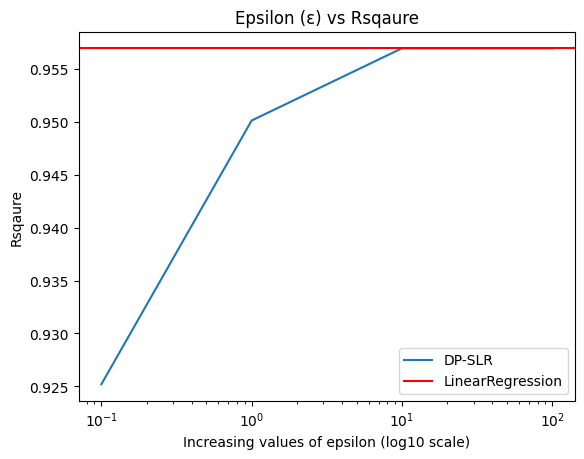

In [164]:
#ε-Differentially Simple Linear Regression (SLR)
epsilon = [10**i for i in range(-1,3)]
r2 = []

for eps in epsilon:
  slope, intercept = dp_slr(data['YearsExperience'], data['Salary'], epsilon = eps)
  y_pred = intercept + (slope*X)
  r2.append(r2_score(y, y_pred))

#Rsqaure vs epsilon plot
plt.xscale("log")
plt.plot(epsilon, r2, label = 'DP-SLR')
plt.axhline(y = slr.score(X, y), color = 'r', linestyle = '-', label = 'LinearRegression')
plt.title('Epsilon (ε) vs Rsqaure')
plt.xlabel('Increasing values of epsilon (log10 scale)')
plt.ylabel('Rsqaure')
plt.legend()
plt.show()